### 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요
- 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)

#### 정규 표현식(Regular Expression)

#### urllib 사용법
- url 관련 데이터를 처리하는 라이브러리
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용

#### 웹에서 파일 다운로드하기

## 정규 표현식
- https://wikidocs.net/4308

## HTTP request method
- requests.get() 
- requests.post() : 파일 전송 가능
- requests.put() : update 요청
- requests.delete() : 삭제 요청

- https://oaksong.github.io/2018/03/16/http-request-methods/

```python
params = {'param1': 'value1', 'param2': 'value'} 
res = requests.get(URL, params=params)
```

```python
data = {'param1': 'value1', 'param2': 'value'} 
res = requests.post(URL, data=data)
```

In [1]:
import re
import requests

In [2]:
URL = 'http://naver.com'
response = requests.get(URL)

In [3]:
response.status_code

200

- HTTP response 정보
    - https://javaplant.tistory.com/18

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
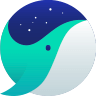
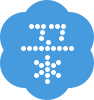

In [4]:
response.text

- findall()
    - 정규식과 매치되는 모든 문자열을 list형식으로 return

In [5]:
# 네이버 실시간 검색어
import re
import requests

re.findall('<span class="ah_k">(.*?)</span>', requests.get('http://naver.com').text)[:20]

[]

In [21]:
import re
import requests

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

r = requests.get('https://datalab.naver.com/keyword/realtimeList.naver?where=main', headers = headers)
re.findall('<span class="item_title">(.*?)</span>', r.text)[:20]

['이상옥',
 '이노메트리',
 '예비군',
 '문재인을 파면한다',
 '양소영',
 '썸랩',
 '장대호',
 '민방위',
 '장록교',
 '민주당 독재당',
 '로트와일러',
 '비츠로테크',
 '예비군 훈련',
 '신평',
 '개코',
 '조수진',
 '임대차3법',
 '민방위훈련',
 '민방위훈련 조회',
 '배틀쉽']

- JSON Encoding: Python Object (dict, list, tuple 등) 를 JSON 문자열로 변경
    - json.dumps(result)
- JSON Decoding: JSON 문자열 -> Python type (dict, list, tuple, 등)
    - json.loads(obj)
    
- json_normalize
    - semi-structured JSON 데이터를 손쉽게 DataFrame으로 전환

In [22]:
# json으로 보기
import json, requests
from pandas.io.json import json_normalize

In [23]:
r = requests.get('http://rank.search.naver.com/rank.js')
json.loads(r.text)

{'ts': '2020-07-29T14:25:00+0900',
 'st': '2020-07-29T14:25:00+0900',
 'et': '2020-07-29T14:25:00+0900',
 'data': [{'category': 'general',
   'data': [{'rank': 1,
     'keyword': '이상옥',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'cvalue': 0,
     'ratio': '.',
     'delta': 0},
    {'rank': 2,
     'keyword': '이노메트리',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'cvalue': 0,
     'ratio': '.',
     'delta': 0},
    {'rank': 3,
     'keyword': '예비군',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'cvalue': 0,
     'ratio': '.',
     'delta': 0},
    {'rank': 4,
     'keyword': '문재인을 파면한다',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'cvalue': 0,
     'ratio': '.',
     'delta': 0},
    {'rank': 5,
     'keyword': '양소영',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'cvalue': 0,
     'ratio': '.',
     'delta': 0},
    {'rank': 6,
     'keyword': '썸랩',
     'change': '+',
     'score': 0,
     'tvalue': 0,
     'c

In [24]:
json_normalize(json.loads(r.text), 'data')

<ipython-input-24-85a99a7b9d72>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(json.loads(r.text), 'data')


,category,data
0,general,"[{'rank': 1, 'keyword': '이상옥', 'change': '+', ..."


In [25]:
json_normalize(json.loads(r.text), ['data', 'data'])

<ipython-input-25-a0f722d2d3be>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(json.loads(r.text), ['data', 'data'])


,rank,keyword,change,score,tvalue,cvalue,ratio,delta
0,1,이상옥,+,0,0,0,.,0
1,2,이노메트리,+,0,0,0,.,0
2,3,예비군,+,0,0,0,.,0
3,4,문재인을 파면한다,+,0,0,0,.,0
4,5,양소영,+,0,0,0,.,0
5,6,썸랩,+,0,0,0,.,0
6,7,장대호,+,0,0,0,.,0
7,8,민방위,+,0,0,0,.,0
8,9,장록교,+,0,0,0,.,0
9,10,민주당 독재당,+,0,0,0,.,0


In [26]:
# json으로 보기
import json, requests
from pandas.io.json import json_normalize

r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text), ['data', 'data'])

<ipython-input-26-9ee2fe0b9b21>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(json.loads(r.text), ['data', 'data'])


,rank,keyword,change,score,tvalue,cvalue,ratio,delta
0,1,이상옥,+,0,0,0,.,0
1,2,이노메트리,+,0,0,0,.,0
2,3,예비군,+,0,0,0,.,0
3,4,문재인을 파면한다,+,0,0,0,.,0
4,5,양소영,+,0,0,0,.,0
5,6,썸랩,+,0,0,0,.,0
6,7,장대호,+,0,0,0,.,0
7,8,민방위,+,0,0,0,.,0
8,9,장록교,+,0,0,0,.,0
9,10,민주당 독재당,+,0,0,0,.,0


#### urllib 사용법
- url 관련 데이터를 처리하는 라이브러리
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용
    - urllib.request       
        - URL 요청을 위한 클래스나 함수들이 정의
    - urllib.parse         
        - URL의 구문을 분석하기 위한 함수들이 정의
    - urllib.error         
        - urllib.request 모듈에 의해 발생된 예외 처리를 위한 예외 클래스들이 정의
    - urllib.robotparse    
        - 웹사이트의 robots.txt 파일에 대한 분석을 위한 단일 클래스가 정의


#### 웹에서 파일 다운로드하기
- urllib.request.urlretrieve(url, savename)
    - url에서 download한 데이터를 파일에 바로 저장
- mem = urllib.request.urlopen(url).read()
    - urlopen()을 사용하면 데이터를 파이썬에서 읽을 수 있다.

In [78]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)

('data/test.png', <http.client.HTTPMessage at 0x1b44f7f6310>)

<img src="./data/test.png" />

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [80]:
img = mpimg.imread(savename)

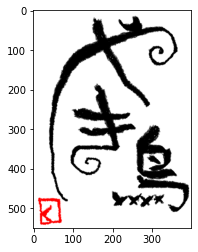

In [81]:
plt.imshow(img)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이썬에서 읽을 수 있다.

In [31]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)

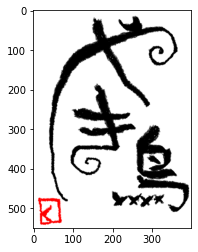

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.imshow(mpimg.imread(savename))

- 문자를 인코딩할 때는 출력 장치(콘솔, 주피터 노트북)가 어떤 인코딩을 지원하는지를 미리 알고 있어야 한다. 
- 만약 출력 장치가 지원하지 않는 방식으로 인코딩하면 화면에는 이상한 글자만 보이게 된다.

### 인코딩(encoding)
- 어떤 글자를 어떤 숫자로 바꿀지에 대한 규칙
- 가장 기본이 되는 인코딩 방식은 아스키(ASCII) 코드
    - http://www.asciitable.com/
- 세계 표준 : 최대 4바이트의 숫자로 전 세계 모든 글자를 대응시킨 것
    - 유니코드(unicode)
    - UTF-8, UTF-16, UTF-32
    - 유니코드를 바이트 열로 변환할 때
        - .encode() 
    - 바이트 열을 유니코드로 변환할 때
        - .decode()




#### 웹 API 이용하기
- Client 정보를 보여주는 샘플 API 사이트 접속

In [33]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read()        # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)
print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=101.1.13.191
REMOTE_HOST=101.1.13.191
REMOTE_PORT=56074
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.8
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=101.1.13.191\nREMOTE_HOST=101.1.13.191\nREMOTE_PORT=56074\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.8\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


## parameter를 전송하여 데이터를 읽는 예

- urllib.parse.urlencode(query)
    - 인자로 받은 매핑 객체 또는 2개의 요소로 이루어진 tuple을 POST 방식으로 전송하기 위한 데이터로 변환
    - query : 
        - 변환할 데이터 문자열
        - 구성 : { key : value }

In [34]:
import urllib.parse

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)

In [35]:
params

'stdId=109'

####  GET  요청을 사용하여 parameter를 보내는 경우
- URL 끝 부분에 ?를 입력하고, key = value 형식으로 매개변수를 추가한다. 
- 여러개의 parameter를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 parameter로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

In [36]:
# 파라미터를 전송하여 데이터를 읽는 예
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"


# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = urllib.request.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2020년 07월 29일 (수)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2020년 07월 29일 (수)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202007290600</tm>
		<wf><![CDATA[○ (강수) 8월 1일(토)~2일(일)은 중부지방, 3일(월)은 서울.경기도와 강원영서에 비가 오겠습니다.<br />○ (기온) 이번 예보기간의 낮 기온은 27~34도로 어제(22~29도)보다 높겠고, 특히 경북내륙을 중심으로 33도 이상 올라 덥겠습니다.<br />          강원동해안과 제주도를 중심으로 아침 최저기온이 25도 이상으로 열대야가 나타나는 곳이 있겠습니다.<br />○ (주말전망) 8월 1일(토)과 2일(일)은 중부지방에 비가 오겠으며, 아침 기온은 23~26도, 낮 기온은 27~34도의 분포를

#### keyboard에서 parameter를 입력받는 방법
- input()

In [37]:
import sys
import urllib.parse as parse
import urllib.request as req

# 명령어를 사용하는 경우 사용법 python3 forecast.py 108
# if len(sys.argv) <= 1:
#     print("python3 forecast.py 지역번호")
#     sys.exit()  
# regionNumber = sys.argv[1]

regionNumber = input()

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

values = {
    'stdId': regionNumber
}

params = parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = req.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


KeyboardInterrupt: Interrupted by user